In [211]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import warnings
warnings.simplefilter("ignore", FutureWarning)

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor, export_graphviz, export_text
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from IPython.display import Image
from IPython.core.display import HTML


df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [212]:
#обработка пропусков
#поиск пропусков
df.isna()
df.dropna()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [213]:
#Кодирование категориальных признаков
df["species"].value_counts()
df["species"] = df["species"].astype('category')
df["island"] = df["island"].astype('category')
df["sex"] = df["sex"].astype('category')

#Назначим закодированную переменную новому столбцу с помощью метода доступа cat.codes
df["species_cat"] = df["species"].cat.codes + 1
df["island_cat"] = df["island"].cat.codes +1
df["sex_cat"] = df["sex"].cat.codes 
df.isna()
df.dropna()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species_cat,island_cat,sex_cat
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,1,3,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1,3,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1,3,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1,3,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,1,3,2
...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,3,1,1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,3,1,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,3,1,2
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,3,1,1


In [214]:
df_cat=df.drop(['species', 'island', 'sex'], axis=1, inplace=True)
df.dropna()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_cat,island_cat,sex_cat
0,39.1,18.7,181.0,3750.0,1,3,2
1,39.5,17.4,186.0,3800.0,1,3,1
2,40.3,18.0,195.0,3250.0,1,3,1
4,36.7,19.3,193.0,3450.0,1,3,1
5,39.3,20.6,190.0,3650.0,1,3,2
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,3,1,1
340,46.8,14.3,215.0,4850.0,3,1,1
341,50.4,15.7,222.0,5750.0,3,1,2
342,45.2,14.8,212.0,5200.0,3,1,1


In [215]:
print('Признаки, имеющие максимальную по модулю корреляцию с массой пингвина')
best_params = df.corr()['body_mass_g'].map(abs).sort_values(ascending=False)[1:]
best_params = best_params[best_params.values > 0.35]
best_params

Признаки, имеющие максимальную по модулю корреляцию с массой пингвина


flipper_length_mm    0.871202
species_cat          0.750491
culmen_length_mm     0.595110
island_cat           0.561515
culmen_depth_mm      0.471916
sex_cat              0.361138
Name: body_mass_g, dtype: float64

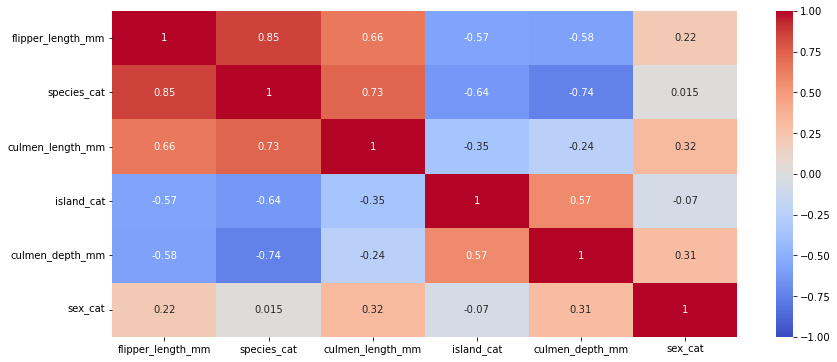

In [216]:
plt.figure(figsize=(14, 6))
sns.heatmap(df[best_params.index].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

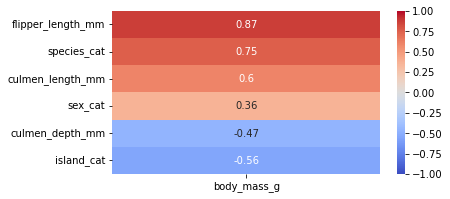

In [217]:
plt.figure(figsize=(6, 3))
sns.heatmap(pd.DataFrame(df[np.append(best_params.index.values, 'body_mass_g')].corr()['body_mass_g'].sort_values(ascending=False)[1:]), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

In [221]:
df.isna()
df = df.dropna()
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_cat,island_cat,sex_cat
0,39.1,18.7,181.0,3750.0,1,3,2
1,39.5,17.4,186.0,3800.0,1,3,1
2,40.3,18.0,195.0,3250.0,1,3,1
4,36.7,19.3,193.0,3450.0,1,3,1
5,39.3,20.6,190.0,3650.0,1,3,2
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,3,1,1
340,46.8,14.3,215.0,4850.0,3,1,1
341,50.4,15.7,222.0,5750.0,3,1,2
342,45.2,14.8,212.0,5200.0,3,1,1


In [227]:
#Разделение выборки на обучающую и тестовую
y=df['body_mass_g'] #.to_numpy()
#X=df.drop('body_mass_g', axis=1)
X = df[best_params.index] #.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [228]:
type(x_train)


pandas.core.frame.DataFrame

In [229]:
#Масштабирование данных
#scaler=MinMaxScaler().fit(x_train)
#x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
#x_test = pd.DataFrame(scaler.transform(x_test), columns=x_train.columns)
#x_train.describe()

#Линейная регрессия
def print_metrics(y_test, y_pred):
    print(f"R^2: {r2_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    

In [230]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_test)
print_metrics(y_test, y_pred_linear)


R^2: 0.8053336022242322
MSE: 133355.3359533476
MAE: 286.30311274644066


In [231]:
#Пополиномиальная регрессия
poly_model = PolynomialFeatures(degree=3)
x_train_poly = poly_model.fit_transform(x_train)
x_test_poly = poly_model.fit_transform(x_test)
linear_model = LinearRegression()
linear_model.fit(x_train_poly, y_train)
y_pred_poly = linear_model.predict(x_test_poly)
print_metrics(y_test, y_pred_poly)

R^2: -9.542844467415676
MSE: 7222327.951409407
MAE: 563.880529579607


In [232]:
#SVM
scaler = StandardScaler().fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_train.columns)
x_train_scaled.describe()

,flipper_length_mm,species_cat,culmen_length_mm,island_cat,culmen_depth_mm,sex_cat
count,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02
mean,5.516275e-16,1.963213e-16,-5.369949e-16,-6.131776e-17,-6.048161e-16,-3.158794e-17
std,1.002099e+00,1.002099e+00,1.002099e+00,1.002099e+00,1.002099e+00,1.002099e+00
min,-2.109146e+00,-1.039286e+00,-2.134737e+00,-9.289935e-01,-2.046527e+00,-3.827457e+00
25%,-8.011531e-01,-1.039286e+00,-8.458894e-01,-9.289935e-01,-7.765382e-01,-6.839442e-01
50%,-2.198230e-01,8.975655e-02,4.359707e-02,5.034546e-01,1.448260e-01,-6.839442e-01
75%,8.701709e-01,1.218799e+00,8.604724e-01,5.034546e-01,7.424677e-01,8.878121e-01
max,2.105497e+00,1.218799e+00,2.857279e+00,1.935903e+00,2.136965e+00,8.878121e-01


In [233]:
params = {'C': np.concatenate([np.arange(0.1, 2, 0.1), np.arange(2, 15, 1)])}
svm_model = SVR(kernel='linear')
grid_cv = GridSearchCV(estimator=svm_model, param_grid=params, cv=10, n_jobs=-1, scoring='r2')
grid_cv.fit(x_train_scaled, y_train)
print(grid_cv.best_params_)


{'C': 14.0}


In [234]:
best_svm_model = grid_cv.best_estimator_
best_svm_model = SVR(kernel='linear', C=11)
best_svm_model.fit(x_train_scaled, y_train)
y_pred_svm = best_svm_model.predict(x_test_scaled)
print_metrics(y_test, y_pred_svm)

R^2: 0.8052968350375075
MSE: 133380.52314843496
MAE: 295.17537702718096


In [235]:
#Дерево решений
params = {'min_samples_leaf': range(3, 30)}
tree = DecisionTreeRegressor(random_state=3)
grid_cv = GridSearchCV(estimator=tree, cv=5, param_grid=params, n_jobs=-1, scoring='neg_mean_absolute_error')
grid_cv.fit(x_train, y_train)
print(grid_cv.best_params_)

{'min_samples_leaf': 7}


In [236]:
best_tree = grid_cv.best_estimator_
best_tree.fit(x_train, y_train)
y_pred_tree = best_tree.predict(x_test)
print_metrics(y_test, y_pred_tree)

R^2: 0.8287563226807713
MSE: 117309.70716937499
MAE: 273.12736414071367


In [237]:
importances = pd.DataFrame(data=zip(x_train.columns, best_tree.feature_importances_), columns=['Признак', 'Важность'])
print('Важность признаков в дереве решений\n')
for row in importances.sort_values(by='Важность', ascending=False).values:
    print(f'{row[0]}: {round(row[1], 3)}')

Важность признаков в дереве решений

species_cat: 0.716
sex_cat: 0.212
culmen_depth_mm: 0.031
flipper_length_mm: 0.022
culmen_length_mm: 0.018
island_cat: 0.001


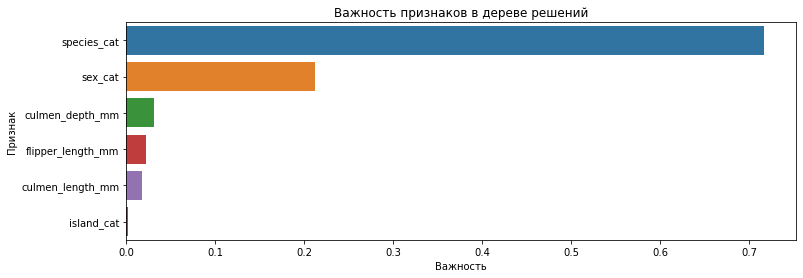

In [238]:
plt.figure(figsize=(12, 4))
sns.barplot(data=importances.sort_values(by='Важность', ascending=False), y='Признак', x='Важность', orient='h', )
plt.title('Важность признаков в дереве решений')
plt.show()

In [240]:
#Сравнение моделей
print('Линейная регрессия')
print_metrics(y_test, y_pred_linear)

print('\nПолиномиальная регрессия')
print_metrics(y_test, y_pred_poly)

print('\nМетод опорных векторов')
print_metrics(y_test, y_pred_svm)

print('\nДерево решений')
print_metrics(y_test, y_pred_tree)

Линейная регрессия
R^2: 0.8053336022242322
MSE: 133355.3359533476
MAE: 286.30311274644066

Полиномиальная регрессия
R^2: -9.542844467415676
MSE: 7222327.951409407
MAE: 563.880529579607

Метод опорных векторов
R^2: 0.8052968350375075
MSE: 133380.52314843496
MAE: 295.17537702718096

Дерево решений
R^2: 0.8287563226807713
MSE: 117309.70716937499
MAE: 273.12736414071367
